# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 4: Regressão** <br/>

Técnicas para modelos de regressão (linear, não-linear), em termos gerais, consiste em predizer o valor de uma variável dependente em função de outras variáveis preditores. 

Por exemplo, imagine poder prever o preço de uma casa, com base em dados, como a taxa de criminalidade na região da casa, número de quartos, etc. Considere a base de dados da cidade de Boston que será explorada a seguir:

In [3]:
#1. primeira ação é explorar os dados da base de dados. Quais dados são?
from sklearn.datasets import load_boston

boston = load_boston()
#itens da base
boston.keys()

print(boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
import pandas

tabela = pandas.DataFrame(boston.data)
tabela.columns = boston.feature_names
tabela.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#mostra uma quantidade maior de linhas, no caso, 10 linhas.
tabela.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
# e o preço?
tabela['Preço'] = boston.target
tabela.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preço
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


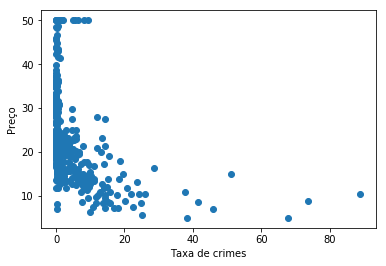

In [13]:
import matplotlib.pyplot as plt
# qual a melhor característica/columa que melhor representa o preço?

#visualmente
plt.scatter(tabela.CRIM, tabela.Preço)
plt.xlabel('Taxa de crimes')
plt.ylabel('Preço')
plt.show()

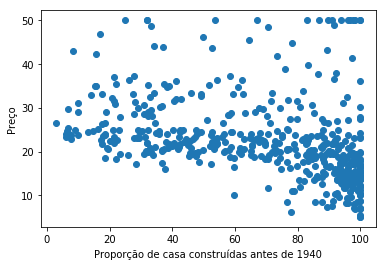

In [19]:
plt.scatter(tabela.AGE, tabela.Preço)
plt.xlabel('Proporção de casa construídas antes de 1940')
plt.ylabel('Preço')
plt.show()

In [20]:
#Métodos de correlação

tabela.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preço
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


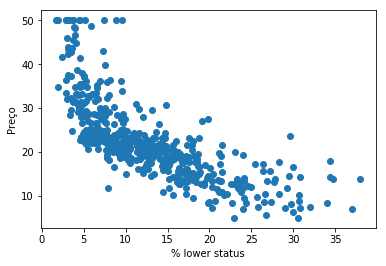

In [40]:
plt.scatter(tabela.LSTAT, tabela.Preço)
plt.xlabel('% lower status')
plt.ylabel('Preço')
plt.show()

In [3]:
#resume o carregamento da base e da tabela
from sklearn.datasets import load_boston
import pandas

boston = load_boston()
tabela = pandas.DataFrame(boston.data)
tabela.columns = boston.feature_names

#seleciona duas colunas
X = tabela[["RM", "LSTAT"]]
print(X)

        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
5    6.430   5.21
6    6.012  12.43
7    6.172  19.15
8    5.631  29.93
9    6.004  17.10
10   6.377  20.45
11   6.009  13.27
12   5.889  15.71
13   5.949   8.26
14   6.096  10.26
15   5.834   8.47
16   5.935   6.58
17   5.990  14.67
18   5.456  11.69
19   5.727  11.28
20   5.570  21.02
21   5.965  13.83
22   6.142  18.72
23   5.813  19.88
24   5.924  16.30
25   5.599  16.51
26   5.813  14.81
27   6.047  17.28
28   6.495  12.80
29   6.674  11.98
..     ...    ...
476  6.484  18.68
477  5.304  24.91
478  6.185  18.03
479  6.229  13.11
480  6.242  10.74
481  6.750   7.74
482  7.061   7.01
483  5.762  10.42
484  5.871  13.34
485  6.312  10.58
486  6.114  14.98
487  5.905  11.45
488  5.454  18.06
489  5.414  23.97
490  5.093  29.68
491  5.983  18.07
492  5.983  13.35
493  5.707  12.01
494  5.926  13.59
495  5.670  17.60
496  5.390  21.14
497  5.794  14.10
498  6.019  12.92
499  5.569

Depois de explorar a base de dados Boston, e verificar quais características podem estar relacionadas ao preço, podemos, então, tentar prever o preço com base em outras variáveis. 

Matematicamente, considere, que o relacionamento entre as variáveis Y e X é representada pela equação:  $Y = aX + B$

em que Y é a variável que pretendemos explorar, no caso do nosso exemplo, o preço, e X são as variáveis que utilizaremos para prever, no caso, a porcentagem de casas com status menor (LSTAT) e a taxa de crimes (RM).

Coeficientes: 
 [ 5.1028653  -0.65154216]
Coeficientes: 
 -1.2447184071454842
 20.204399999999996 24.0 20.19409847378949


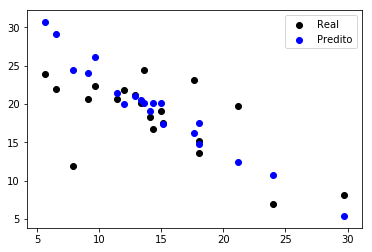

In [48]:
#separa dados de treinamento do modelo linear e dados para validação do modelo
#inclui o modulo de regressão linear
from sklearn import linear_model
import matplotlib.pyplot as plt

#separa em dois conjuntos, um para treinamento e outro para validação (20 últimos)
X_t = X[:-20]
X_v = X[-20:]
#print(X_t["RM"])
y_t = tabela["Preço"][:-20]
y_v = tabela["Preço"][-20:]

regr = linear_model.LinearRegression()

# treina o modelo
regr.fit(X_t, y_t)

# faz a predição
y_pred = regr.predict(X_v)

# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)
#y = 5.10*RM + -0.65*LSTAT + -1.24

#prediz manualmente os valores com base nos coeficientes encontrados na regressao
y_teste = 5.10*X_v["RM"] - 0.65*X_v["LSTAT"]- 1.24

#exibe o valor predito manualmente y_teste, que começa de 486
#exibe o valor real y_t
#exibe o valor predito pela regressão linear

print(y_teste[486], y_t[0],y_pred[0])

#plota todos os valores de validação
plt.scatter(X_v["LSTAT"], y_v,  color='black')
plt.scatter(X_v["LSTAT"], y_pred, color='blue')
plt.legend(["Real", "Predito"])

**Atividade**: Para turma A (que não fez IA), as equipes devem fazer para a base de dados Diabetes, também do sklearn.datasets, o processo de exploração dos dados, seleção de características e predição dos valores. Para a turma B(que fez IA), as equipes devem trazer outra base de dados e fazer o processo descrito acima.

Para todas as equipes, cada membro deve ser responsável por uma etapa, e sua colaboração deve ser explicíta no github.

**Referências para aula:**

http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

http://archive.ics.uci.edu/ml/index.php